In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [8]:
df = pd.read_csv("Data_with_missing_values.csv")

In [9]:
df.describe

<bound method NDFrame.describe of    Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes>

In [10]:
data = [go.Bar(
            x= df.Age,
            y= df.Salary
    )]

iplot(data, filename='basic-bar')

# Imputing values

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
def get_values(strateg):
    all_vals = df[["Age","Salary"]].values
    indexing = df.index
    imp_mean = SimpleImputer(missing_values=np.nan, strategy=strateg)
    transformed = imp_mean.fit_transform(all_vals)
    gen_df = pd.DataFrame(data=transformed,index=indexing, columns=["Age","Salary"])
    print(gen_df.iloc[4:7])

## SimpleImputer

### strategies

If <b>“mean”</b>, then replace missing values using the mean along each column. Can only be used with numeric data. <br>
If <b>“median”</b>, then replace missing values using the median along each column. Can only be used with numeric data. <br>
If <b>“most_frequent”</b>, then replace missing using the most frequent value along each column. Can be used with strings or numeric data. <br>
If <b>“constant”</b>, then replace missing values with fill_value. Can be used with strings or numeric data. <br>

In [214]:
strategies = ["mean","median","most_frequent","constant"]

In [218]:
for st in strategies:
    print("#### "+st+" ####")
    get_values(st)

#### mean ####
         Age        Salary
4  40.000000  63777.777778
5  35.000000  58000.000000
6  38.777778  52000.000000
#### median ####
    Age   Salary
4  40.0  61000.0
5  35.0  58000.0
6  38.0  52000.0
#### most_frequent ####
    Age   Salary
4  40.0  48000.0
5  35.0  58000.0
6  27.0  52000.0
#### constant ####
    Age   Salary
4  40.0      0.0
5  35.0  58000.0
6   0.0  52000.0


## Imputation Using k-NN

The algorithm uses ‘feature similarity’ to predict the values of any new data points.

### Impyute

Impyute is a library of missing data imputation

In [6]:
import impyute as impy
n = 5
arr = np.random.uniform(high=6, size=(n, n))
for _ in range(3):
    arr[np.random.randint(n), np.random.randint(n)] = np.nan
print(arr)
print("##")
print(impy.mean(arr))

[[5.53153275 1.93401272 0.97374856 5.13780234 5.74554259]
 [1.63072537 2.97046276 1.48737362 3.34463464 4.79803188]
 [0.11645817 5.55819866        nan 1.78948356 5.49869344]
 [5.42678129 1.10840752 5.65593805 1.87969125        nan]
 [3.92309052 3.93869846        nan 1.22286186 5.79338009]]
##
[[5.53153275 1.93401272 0.97374856 5.13780234 5.74554259]
 [1.63072537 2.97046276 1.48737362 3.34463464 4.79803188]
 [0.11645817 5.55819866 2.70568674 1.78948356 5.49869344]
 [5.42678129 1.10840752 5.65593805 1.87969125 5.458912  ]
 [3.92309052 3.93869846 2.70568674 1.22286186 5.79338009]]


#### impyute funcitons

Imputation of Cross Sectional Data
<ul>
<li>K-Nearest Neighbours
<li>Multivariate Imputation by Chained Equations
<li>Expectation Maximization
<li>Mean Imputation
<li>Mode Imputation
<li>Median Imputation
<li>Random Imputation
</ul>

## Imputation Using k-NN

In [54]:
import sys
from impyute.imputation.cs import fast_knn
# start the KNN training
all_vals = df[["Age","Salary"]].values
imputed_training=fast_knn(all_vals, k=9) # max  is lengh of the bumber of the array's rows
imputed_training

array([[4.40000000e+01, 7.20000000e+04],
       [2.70000000e+01, 4.80000000e+04],
       [3.00000000e+01, 5.40000000e+04],
       [3.80000000e+01, 6.10000000e+04],
       [4.00000000e+01, 6.54648901e+04],
       [3.50000000e+01, 5.80000000e+04],
       [4.35061795e+01, 5.20000000e+04],
       [4.80000000e+01, 7.90000000e+04],
       [5.00000000e+01, 8.30000000e+04],
       [3.70000000e+01, 6.70000000e+04]])

## Imputation Using Multivariate Imputation by Chained Equation (MICE)

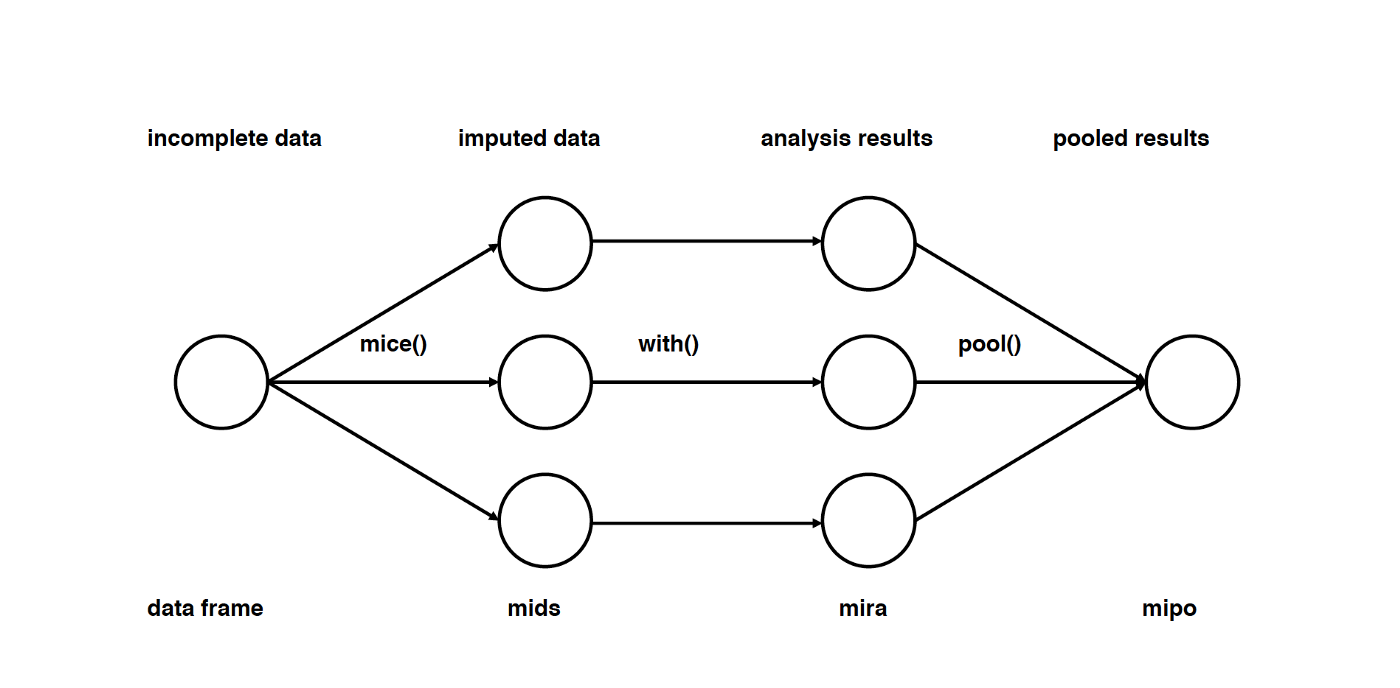

In [58]:
from IPython.display import Image
Image(filename='mice.png')

This type of imputation works by filling the missing data multiple times. Multiple Imputations (MIs) are much better than a single imputation as it measures the uncertainty of the missing values in a better way. 

In [60]:
from impyute.imputation.cs import mice
# start the MICE training
imputed_training=mice(all_vals)
imputed_training

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning:

internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.



array([[4.40000000e+01, 7.20000000e+04],
       [2.70000000e+01, 4.80000000e+04],
       [3.00000000e+01, 5.40000000e+04],
       [3.80000000e+01, 6.10000000e+04],
       [4.00000000e+01, 6.72145199e+04],
       [3.50000000e+01, 5.80000000e+04],
       [2.98946474e+01, 5.20000000e+04],
       [4.80000000e+01, 7.90000000e+04],
       [5.00000000e+01, 8.30000000e+04],
       [3.70000000e+01, 6.70000000e+04]])

# interpolation

method : {‘linear’, ‘time’, ‘index’, ‘values’, ‘nearest’, ‘zero’, ‘slinear’, ‘quadratic’, ‘cubic’, ‘barycentric’, ‘krogh’, ‘polynomial’, ‘spline’, ‘piecewise_polynomial’, ‘from_derivatives’, ‘pchip’, ‘akima’}

<b>linear : </b> If the two known points are given by the coordinates, the linear interpolant is the straight line between these points. For a value x in the interval, the value y along the straight line is given from the equation of slopes.

In [146]:
Methods = ["linear","index","values","nearest","zero","slinear","quadratic","cubic",
           "barycentric","krogh","piecewise_polynomial","from_derivatives","pchip","akima"]
# "time" only works on Series or DataFrames with a DatetimeIndex
# "polynomial"
#  spline"

In [147]:
for m in Methods:
    print("#### "+ m + " ####")
    print(df.interpolate(method =m, limit_direction ='forward')[4:7])

#### linear ####
   Country   Age   Salary Purchased
4  Germany  40.0  59500.0       Yes
5   France  35.0  58000.0       Yes
6    Spain  41.5  52000.0        No
#### index ####
   Country   Age   Salary Purchased
4  Germany  40.0  59500.0       Yes
5   France  35.0  58000.0       Yes
6    Spain  41.5  52000.0        No
#### values ####
   Country   Age   Salary Purchased
4  Germany  40.0  59500.0       Yes
5   France  35.0  58000.0       Yes
6    Spain  41.5  52000.0        No
#### nearest ####
   Country   Age   Salary Purchased
4  Germany  40.0  61000.0       Yes
5   France  35.0  58000.0       Yes
6    Spain  35.0  52000.0        No
#### zero ####
   Country   Age   Salary Purchased
4  Germany  40.0  61000.0       Yes
5   France  35.0  58000.0       Yes
6    Spain  35.0  52000.0        No
#### slinear ####
   Country   Age   Salary Purchased
4  Germany  40.0  59500.0       Yes
5   France  35.0  58000.0       Yes
6    Spain  41.5  52000.0        No
#### quadratic ####
   Country     